In [0]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sortedcontainers import SortedList

from datetime import datetime

In [0]:

def get_donut():
    N = 200
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y

In [0]:
class KNN(object):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        y = np.zeros(len(X))
        for i,x in enumerate(X): # test points
            sl = SortedList() # stores (distance, class) tuples
            for j,xt in enumerate(self.X): # training points
                diff = x - xt
                d = diff.dot(diff)
                if len(sl) < self.k:
                    # don't need to check, just add
                    sl.add( (d, self.y[j]) )
                else:
                    if d < sl[-1][0]:
                        del sl[-1]
                        sl.add( (d, self.y[j]) )
            # print "input:", x
            # print "sl:", sl

            # vote
            votes = {}
            for _, v in sl:
                # print "v:", v
                votes[v] = votes.get(v,0) + 1
            # print "votes:", votes, "true:", Ytest[i]
            max_votes = 0
            max_votes_class = -1
            for v,count in iteritems(votes):
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        return y

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

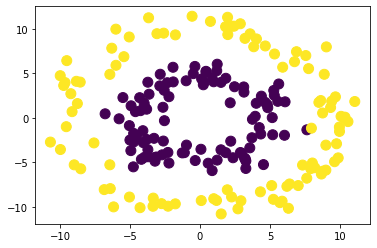

In [0]:
X,Y=get_donut()
plt.scatter(X[:,0],X[:,1],s=100,c=Y,alpha=1)
plt.show()

In [0]:
model=KNN(3)
model.fit(X,Y)
print ("accuracy: ",model.score(X,Y))

accuracy:  0.995
